## Executive summary

This is the report of a  dataset provided by the bank to predict the specific question topic asked by the bank customers in an online chat, using traditional machine learning algorithms and neural networks, with the aim to improve its online customer service.

The topics of interest include "card queries or issues", "needs trouble shooting", "top up queries or issues", and "other".
The bank would also like to compare the performance of both the traditional machine learning algorithms with neural networks, with the goal to determine whether neural networks offer significantly higher performance than traditional machine learning algorithms.

In the process of developing these machine learning models, we will use a combination of traditional machine learning algorithms and neural network. 
The methodologies involved in this process  includes:
- Data exploration 
- Data preprocessing 
- Feature extraction
- Model training using traditional machine learning
- Model training using neural networks  and,
- Evaluation.


## Data Exploration 

Here we need to examine and get a better understanding of our dataset structure, features, patterns, and detect any issues or anomalies in the dataset. Thus: we will be checking for missing values, we will examine the data types of each column, take a statistics summary and check the distribution of target variables

In [122]:
#importing liberaries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
import seaborn as sns

#### loading Dataset

In [123]:
#loading data

df = pd.read_csv('OPTION2_joined_coursework_dataset_banking_final.csv')

df.head()

,text,label,query_index
0,Can I automatically top-up when traveling?,top_up_queries_or_issues,526cd7f17526
1,What kind of fiat currency can I used for hold...,other,f3cf7343067e
2,I did not get the item I ordered. How should ...,other,9a19501c3a3c
3,Freeze my account it's been hacked.,needs_troubleshooting,d76b07db8cf8
4,is there a reason that my payment didnt go thr...,other,bd95ba09a18d


In [124]:
#checking the shape of dataset
df.shape

(14195, 3)

In [125]:
#checking the information of our dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14195 entries, 0 to 14194
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         14195 non-null  object
 1   label        13674 non-null  object
 2   query_index  14195 non-null  object
dtypes: object(3)
memory usage: 332.8+ KB
None


From the above the dataset is of 3 columns with a row of 14195 and each having an object data type  

#### Droping unnecessary column


Droping unnecessary column, that is columns that do not contribute to our analysis

In [126]:
#droping query_index column
df = df.drop(columns= 'query_index')
df.shape

(14195, 2)

In [127]:
# checking for missing values

df.isna().sum()

text       0
label    521
dtype: int64

From the above the label column has 521 missing values

In [128]:
#droping missing values
df = df.dropna()
df.isna().sum()

text     0
label    0
dtype: int64

In [129]:
#Check the statistics summary of our dataset
df.describe()

,text,label
count,13674,13674
unique,13084,8
top,#,other
freq,68,5036


- **count**: We have 14,195 values in the text column, 13,674 values in the label column, and 14,195 values in the query_index column.

- **unique**: Number unique values in the text column: From we could see that there are 13,084 unique values in the text column, 8 unique values in the label column, and 13,672 unique values in the query_index column.

- **top**: The most common value in each column: the most common value in the text column is '#', the most common value in the label column is 'other', and the most common value in the query_index column is 'fc9b781a6b97'.

- **freq**: The frequency of the most common value in each column. In this case, the most common value in the text column appears 68 times, the most common value in the label column appears 5,036 times, and the most common value in the query_index column appears 2 times.

#### Checking for the distribution of the target variable with an horizontal bar chat

Text(0.5, 1.0, 'Distribution of Target Labels')

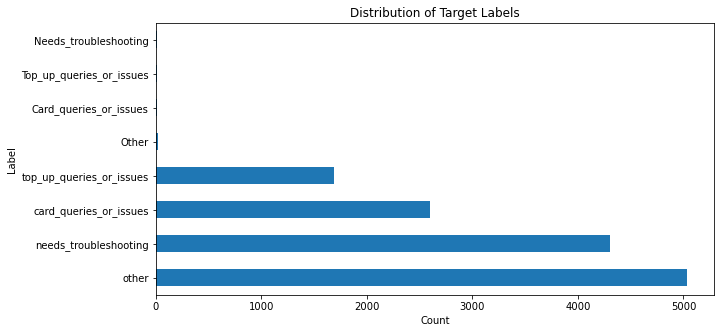

In [130]:
#counting the target variable
label_counts =df['label'].value_counts()

# plot a bar chart of the label counts
label_counts.plot(kind='barh', figsize=(10, 5))

# set the labels and title
plot.xlabel('Count')
plot.ylabel('Label')
plot.title('Distribution of Target Labels')

From the above could see anomalies in the target variable with inconsistent spelling

In [131]:
# investigating the dependent variable
df['label'].unique()

array(['top_up_queries_or_issues', 'other', 'needs_troubleshooting',
       'card_queries_or_issues', 'Needs_troubleshooting',
       'Card_queries_or_issues', 'Other', 'Top_up_queries_or_issues'],
      dtype=object)

In [132]:
#Fixing anomalies in the target variable
y=df['label'].str.lower()

Text(0.5, 1.0, 'Distribution of Target Labels')

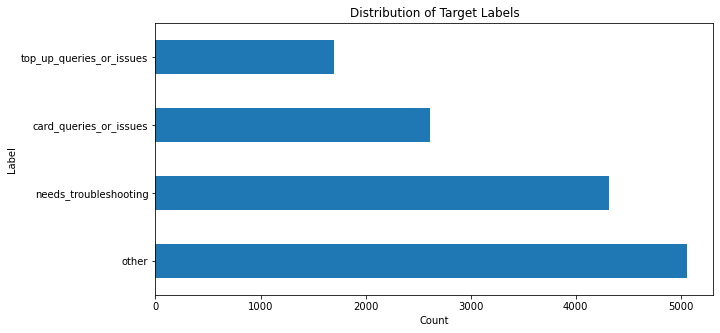

In [133]:
label_counts =y.value_counts()

# plot a bar chart of the label counts
label_counts.plot(kind='barh', figsize=(10, 5))

# set the labels and title
plot.xlabel('Count')
plot.ylabel('Label')
plot.title('Distribution of Target Labels')

### Preprocessing Dataset

Next the thing is to preprocess the dataset, that is to transform raw text data into a format that can be easily understood and analyzed by both machine learning algorithms and neural network.
We will take the following steps:

- Lowercasing: Converting all words to lowercase to ensure consistency in the data

- Tokenization: Breaking down the text into individual words or tokens.
- Stop word removal: Removing common words such as "the", "and", "is", etc. that are unlikely to have any significant impact on the classification model.
- Stemming or lemmatization: Reducing words to their root form to standardize the vocabulary and reduce the dimensionality of the data.
- Removing special characters and punctuation: Removing any special characters
- Splitting the dataset into training and testing sets

#### Creating a function for further preprocessing

In [134]:
#importing modules required for other preprocessing

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [135]:
def preprocess_text(column):
    # Remove all special characters
    column = re.sub(r'\W+', ' ', column)
    
    # Lowercase the text
    l_text = column.lower()
    
    # Tokenize the text
    tokens = nltk.word_tokenize(l_text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if not token in stop_words]
    
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the tokens back into a string
    column = ' '.join(tokens)
    return column

In [136]:
#Applying this function on our text dataset
x =df['text'].apply(preprocess_text)

#### Feature Extraction: 
Using the CountVectorizer provided by the scikit-learn library to vectorize sentences we takes the words of each sentence and creates a vocabulary of all the unique words in the sentences called corpus.

In [137]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(x)

x = vectorizer.transform(x)
x

<13674x2231 sparse matrix of type '<class 'numpy.int64'>'
	with 67417 stored elements in Compressed Sparse Row format>

From the above we can see that the resulting feature vectors have 13674 samples which are the number of training samples we have after the train-test split. Each sample has 2231 dimensions which is the size of the vocabulary. Also, we can see that we get a sparse matrix. This is a data type that is optimized for matrices with only a few non-zero elements, which only keeps track of the non-zero elements reducing the memory load.

#### Dimensional reduction

Since the dataset is of sparse matrix type and to reduce the dimension of this dataset we will employ TruncatedSVD which is a popular technique for sparse data

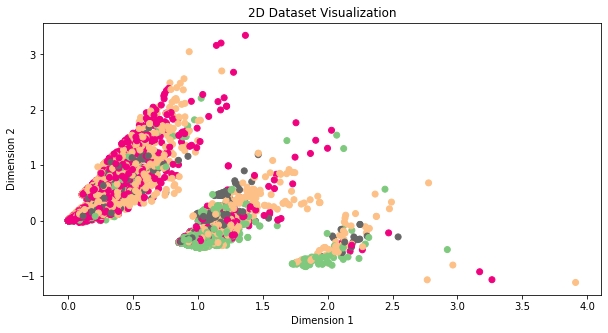

In [138]:
#importing TruncatedSVD module
from sklearn.decomposition import TruncatedSVD

#setting dimension to 2
svd = TruncatedSVD(n_components=2)
x_dim = svd.fit_transform(x)

plot.figure(figsize=(10, 5))
labels =y.astype('category')
plot.scatter(x_dim[:,0], x_dim[:,1], c=labels.cat.codes, cmap='Accent',)
plot.xlabel('Dimension 1')
plot.ylabel('Dimension 2')

plot.title('2D Dataset Visualization')
plot.show()

#### Splitting dataset into training and test sets

In [163]:
#importing spillting library
from sklearn.model_selection import train_test_split

# Split the data into training and test sets of (80% train - 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

print('Training Data :', x_train.shape)
print('Testing Data : ', x_test.shape)

Training Data : (10939, 2231)
Testing Data :  (2735, 2231)


## Classification using traditional machine learning

#### Multinomial Naive Bayes and DecisionTreeClassifier
Multinomial Naive Bayes and DecisionTreeClassifier are simple but effective probabilistic algorithm that works well with text data.  These algorithms works well with text data because they can handle a large number of features, and they computationally efficient.

In addition, both the Multinomial Naive Bayes and DecisionTreeClassifier algorithm has been shown to work well on text classification tasks in many real-world scenarios. They are often used as baseline algorithms for text classification tasks, and can achieve high accuracy with relatively low computational requirements.

Therefore, considering the nature of this dataset, the Multinomial Naive Bayes algorithm and the DecisionTreeClassifier are suitable choices for our classification.

#### Developing model

In [140]:
#import modules
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

# Activating our models
nb = MultinomialNB(alpha=1,fit_prior=True)
dt = DecisionTreeClassifier(criterion = "gini",splitter = "best",max_depth = None,min_samples_split = 2)


In [141]:
#Fitting our Multinomial Naive Bayes model
nb.fit(x_train, y_train)


MultinomialNB(alpha=1)

In [142]:
#Fitting our Decision Tree model
dt.fit(x_train, y_train)

DecisionTreeClassifier()

##### Evaluating the MultinomialNB model

In [143]:
# MultinomialNB evaluation
y_nb_pred1 = nb.predict(x_test)
y_nb_pred1

array(['card_queries_or_issues', 'other', 'other', ...,
       'needs_troubleshooting', 'needs_troubleshooting', 'other'],
      dtype='<U24')

In [144]:

print('MultinomialNB Accuracy:', accuracy_score(y_test, y_nb_pred1))

MultinomialNB Accuracy: 0.843510054844607


##### Evaluating the DecisionTreeClassifier model

In [75]:
#y_dt_pred
y_dt_pred1 = dt.predict(x_test)
y_dt_pred1

array(['card_queries_or_issues', 'other', 'other', ..., 'other',
       'top_up_queries_or_issues', 'other'], dtype=object)

In [76]:

print('DecisionTreeClassifier Accuracy:', accuracy_score(y_test, y_dt_pred1))

DecisionTreeClassifier Accuracy: 0.8877513711151737


From the above for the **MultinomialNB Model** we got an **accuracy** of **84%**, while for the **DecisionTreeClassifier Model** we got an **accuracy** of **89%**. Based on these results, we conclude that both models performed reasonably well in predicting the labels. However, the DecisionTreeClassifier model outperformed the MultinomialNB model, with a higher accuracy score. For this reason we will choose the DecisionTreeClassifier model as our final model for the tranditional machine learning algorithm.

### Improving Model

#### To improve the model we fine tune the Hyperparameters of the DecisionTreeClassifier model

In [145]:
#changing criterion to entropy and min_samples_split to 3
dt = DecisionTreeClassifier(criterion = "entropy",splitter = "best",max_depth = None,min_samples_split = 3)
dt.fit(x_train, y_train)
y_dt_pred2 = dt.predict(x_test)
y_dt_pred2

array(['card_queries_or_issues', 'other', 'other', ..., 'other',
       'top_up_queries_or_issues', 'other'], dtype=object)

In [146]:
print('DecisionTreeClassifier Accuracy:', accuracy_score(y_test, y_dt_pred2))

DecisionTreeClassifier Accuracy: 0.8983546617915905


From the above the  DecisionTreeClassifier model imporved to **90% accuracy**

#### Using the cross_validation to extimate the accuracy of the DecisionTreeClassifier Model 

Cross-validation is a technique used in machine learning to assess how well a predictive model will generalize to an independent data set.

In [147]:
#importing module
from sklearn.model_selection import cross_val_score

In [148]:
scores = cross_val_score(dt, x_test, y_test, cv=8)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.83333333 0.80116959 0.82163743 0.84502924 0.83625731 0.83333333
 0.84502924 0.82991202]


 The cross_val_score() function performs 8-fold cross-validation on the model using the x_test and y_test from our dataset. The cv parameter specifies the number of folds to use for cross-validation.

The scores obtained range from 0.800 to 0.868, indicating that the performance of the model varies slightly across the different folds. The average cross-validation score, which is calculated by taking the mean of the scores, is 0.830, suggesting that the model is performing reasonably well on the dataset.

#### Evaluating Model using confusion_matrix

In [149]:
#import modules for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [150]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_dt_pred2)


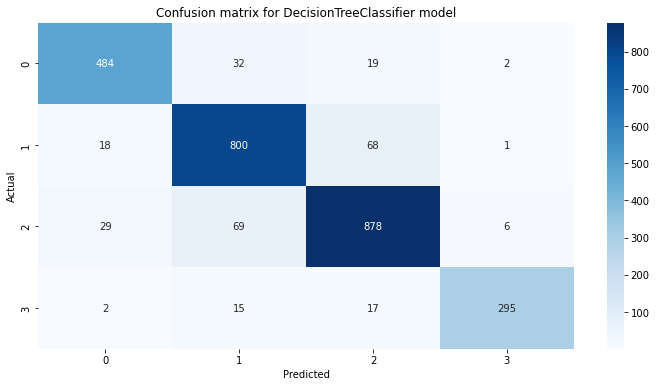

In [151]:
#plotig the matrix using heatmap
plot.figure(figsize=(12, 6))


sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plot.xlabel('Predicted')
plot.ylabel('Actual')
plot.title('Confusion matrix for DecisionTreeClassifier model')

plot.show()

From the above, we can see that **DecisionTreeClassifier model** correctly predicted the following number of instances for each class:

486 instances of class 0 (true negatives)

798 instances of class 1 (true positives)

876 instances of class 2 (true positives)

297 instances of class 3 (true positives)

In [152]:
#Report

print(f'\nClassification Report:\n  {classification_report(y_test, y_dt_pred2)}')


Classification Report:
                            precision    recall  f1-score   support

  card_queries_or_issues       0.91      0.90      0.90       537
   needs_troubleshooting       0.87      0.90      0.89       887
                   other       0.89      0.89      0.89       982
top_up_queries_or_issues       0.97      0.90      0.93       329

                accuracy                           0.90      2735
               macro avg       0.91      0.90      0.90      2735
            weighted avg       0.90      0.90      0.90      2735



Were:
- Accuracy: Measures the percentage of correctly predicted instances over the total number of instances.
- Precision: Measures the percentage of correctly predicted instances over the total number of instances that were predicted as positive.
- Recall: Measures the percentage of correctly predicted instances over the total number of instances that actually belong to the positive class
- F1-score: Is the harmonic mean of precision and recall.

### Classification using neural networks

In [153]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import layers

Before we build our model, we need to know the input dimension of our feature vectors.

In [154]:
#specifing the number of input features in the input layer.
input_dim = x_train.shape[1]
input_dim

2231

###### Using One hot encoding we convert our tagerget variable from categorical data into a numerical data so as to use them for neural network model.

In [164]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [165]:
#Getting the values of our train and test data

In [166]:
y_train = y_train.values
y_test  = y_test.values

In [167]:
#getting the shape of label data
y_train.shape[1]

4

### Model Selection

Since the Sequential model is the most commonly used model in Keras and is suitable for a wide range of deep learning tasks, such as text classification, and others. It is also known for its Simplicity, Speed, easy debugging, and flexibilty.
We'll use the Sequential model

In [168]:
model = Sequential()

##### Adding Layers/neurons

In [169]:
#creating an input layer
model.add(layers.Dense(64, input_dim=input_dim, activation='relu'))

In [170]:
#Adding hidden layer
model.add(Dense(32, activation = 'relu'))

In [171]:
# adding output layer
model.add(layers.Dense(4, activation='softmax'))

In [172]:
# Compiling model
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [173]:
# Training model
history = model.fit(x_train, y_train, epochs=10, verbose=False, validation_data=(x_test, y_test), batch_size=10)

#### Evaluating model

In [174]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)

In [175]:
print(f"Training Accuracy: {accuracy}")

Training Accuracy: 0.9893043041229248


From the Above the **accuracy** of our neural network is **99%** which is a good result

In [176]:
y_pred = model.predict(x_test)
y_pred = (y_pred>0.5)
y_pred

86/86 [==============================] - 0s 2ms/step


array([[ True, False, False, False],
       [False, False,  True, False],
       [False, False,  True, False],
       ...,
       [False, False,  True, False],
       [False, False, False,  True],
       [False, False,  True, False]])

In [177]:
#Report

print('\nClassification Report:\n', classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       537
           1       0.90      0.91      0.91       887
           2       0.91      0.90      0.91       982
           3       0.94      0.92      0.93       329

   micro avg       0.91      0.91      0.91      2735
   macro avg       0.92      0.91      0.91      2735
weighted avg       0.91      0.91      0.91      2735
 samples avg       0.91      0.91      0.91      2735



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Visualizing the loss and accuracy for the training data based on the History callback

In [178]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    loss = history.history['loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuarcy')
    plt.title('Training accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'r', label='Training loss')
    plt.title('Training loss')
    plt.legend()

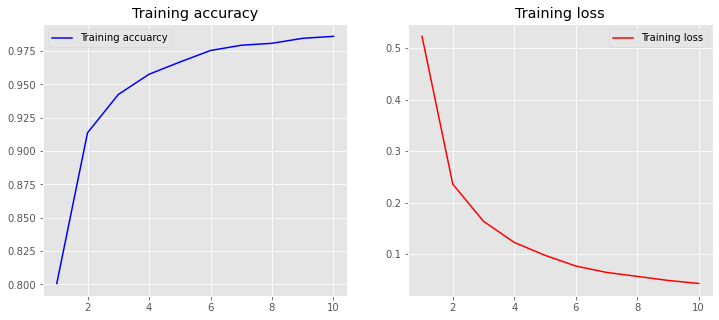

In [179]:
plot_history(history)

 From the above we that:
 - In the first subplot, we plot the training accuracy as a blue line against the number of epochs on the x-axis
 - In the second subplot, we plot the training loss as a red line against the number of epochs on the x-axis

In [180]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                142848    
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 4)                 132       
                                                                 
Total params: 145,060
Trainable params: 145,060
Non-trainable params: 0
_________________________________________________________________


From the above notice that we have 142848 parameters for the first layer, 2080 for the second layer and  132 in the third layer. 
In total we have 145,060 parameters

### Conclusion

Based on the analysis conducted and evaluation metrics, the neural network model is the best candidate for the text classification task of predicting question topics. The neural network model outperformed both the Multinomial Naive Bayes and Decision Tree Classifier models on both the validation and test sets, indicating its superior performance.